In [1]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pylab as plt
import glob
import os
import numpy as np
from scipy import stats

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ozkilim/anaconda3/envs/clam/lib/python3.7/s

In [2]:
def test_auc(tf_path):
    """Take a tf output path and create a list of values for the validtion auc of an experement"""
    auc = []
    for event in summary_iterator(tf_path):
        for value in event.summary.value:
            if value.tag == "final/test_auc":
                auc.append(value.simple_value)
    return auc



def plot_splits(root_dir,ax,data_size,c,label=None, marker="o"):
    # Set the root directory to search
    all_aucs = []
    file_extension = "*.gpu1"
    # Recursively traverse the directory and its subdirectories
    for subdir, _, files in os.walk(root_dir):
        # Use glob to find all files with the specified extension
        for file in glob.glob(os.path.join(subdir, file_extension)):
            auc = test_auc(file)
            all_aucs.append(auc[0])
    # plot mean and range  
    ax.set_ylim([0,1])
    boxplot = ax.boxplot(all_aucs,
                vert=True,  # vertical box alignment
                patch_artist=True,  # fill with color
                positions=[data_size],labels=[label])
    boxplot['boxes'][0].set_facecolor(c)
    boxplot['medians'][0].set_color('black')
    ax.set_ylabel("Test auc")


  

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Text(0.5, 0.98, 'TCGA-OV CLAM test AUC scores.')

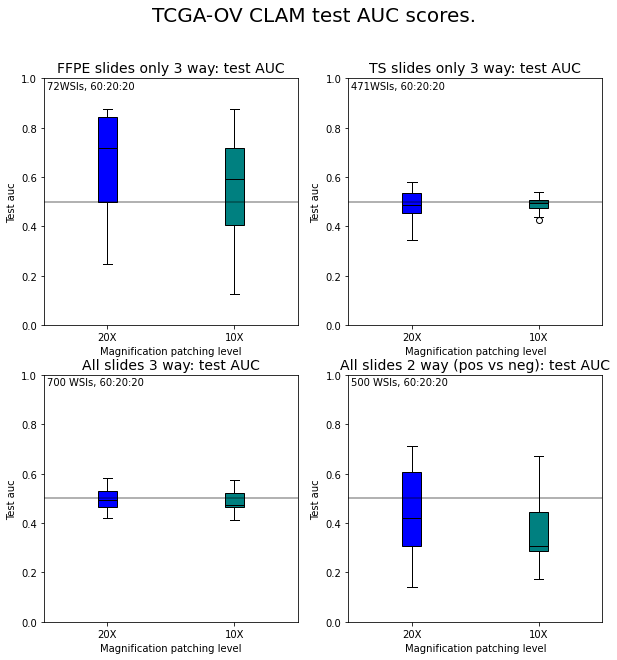

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10)) #was 18 11
fig.patch.set_facecolor('white')
  
root_dir = "/mnt/ncshare/ozkilim/BRCA/results/task_1_FFPE_level_0_4727_s1"  
plot_splits(root_dir,axes[0,0],0,c='blue',label="20X", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/task_1_FFPE_level_1_284_s1"  
plot_splits(root_dir,axes[0,0],1,c='teal',label="10X", marker="o")

axes[0,0].set_title("FFPE slides only 3 way: test AUC", fontsize=14)
axes[0,0].text(.01, .99, '72WSIs, 60:20:20', ha='left', va='top', transform=axes[0,0].transAxes)
axes[0,0].axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes[0,0].set_xlabel("Magnification patching level")
# axes[0].legend()


root_dir = "/mnt/ncshare/ozkilim/BRCA/results/task_1_level_0_TS_1060_s1"  
plot_splits(root_dir,axes[0,1],0,c='blue',label="20X", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/task_1_level_1_TS_3714_s1"  
plot_splits(root_dir,axes[0,1],1,c='teal',label="10X", marker="o")

axes[0,1].set_title("TS slides only 3 way: test AUC", fontsize=14)
axes[0,1].text(.01, .99, '471WSIs, 60:20:20', ha='left', va='top', transform=axes[0,1].transAxes)
axes[0,1].axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes[0,1].set_xlabel("Magnification patching level")
# axes[1].legend()



# plot all slides experement


root_dir = "/mnt/ncshare/ozkilim/BRCA/results/task_1_all_level_0_189_s1"  
plot_splits(root_dir,axes[1,0],0,c='blue',label="20X", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/task_1_all_level_1_2165_s1"  
plot_splits(root_dir,axes[1,0],1,c='teal',label="10X", marker="o")

axes[1,0].set_title("All slides 3 way: test AUC", fontsize=14)
axes[1,0].text(.01, .99, '700 WSIs, 60:20:20', ha='left', va='top', transform=axes[1,0].transAxes)
axes[1,0].axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes[1,0].set_xlabel("Magnification patching level")
# axes[1].legend()

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/task_1_pos_neg_level_0_2156_s1"  
plot_splits(root_dir,axes[1,1],0,c='blue',label="20X", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/task_1_pos_neg_level_1_6812_s1"  
plot_splits(root_dir,axes[1,1],1,c='teal',label="10X", marker="o")

axes[1,1].set_title("All slides 2 way (pos vs neg): test AUC", fontsize=14)
axes[1,1].text(.01, .99, '500 WSIs, 60:20:20', ha='left', va='top', transform=axes[1,1].transAxes)
axes[1,1].axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes[1,1].set_xlabel("Magnification patching level")
# axes[1].legend()
fig.suptitle("TCGA-OV CLAM test AUC scores.",fontsize=20)

# fig.savefig('../figures/first_round_tests.png', dpi=300 ,bbox_inches='tight', pad_inches=.2, facecolor='white')

FileNotFoundError: [Errno 2] No such file or directory: '../figures/NERO_comparason.png'

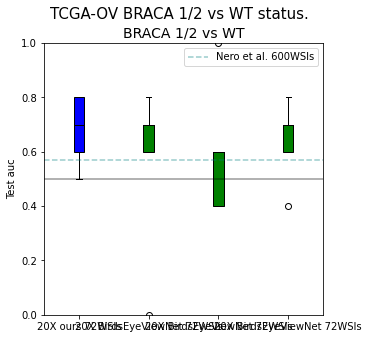

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5)) #was 18 11
fig.patch.set_facecolor('white')
  
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/task_1_FFPE_NERO_level_0_7939_s1" 
root_dir = "/mnt/ncshare/ozkilim/BRCA/results/FFPE_level_0_BRCA_VS_WT_3501_s1" 
plot_splits(root_dir,axes,0,c='blue',label="20X ours 72WSIs", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/FFPE_level_0_BRCA_VS_WT__lr6_20_epoc_2891_s1"  
plot_splits(root_dir,axes,1,c='green',label="20X BirdsEyeViewNet 72WSIs", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/FFPE_level_0_BRCA_VS_WT__lr4_20_epoc_7304_s1"  
plot_splits(root_dir,axes,2,c='green',label="20X BirdsEyeViewNet 72WSIs", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/FFPE_level_0_BRCA_VS_WT__lr5_20_epoc_3311_s1"  
plot_splits(root_dir,axes,3,c='green',label="20X BirdsEyeViewNet 72WSIs", marker="o")


axes.axhline(0.57, linestyle='--', color='teal',alpha=0.4,label="Nero et al. 600WSIs")  # Add a dashed line at y=0

axes.set_title("BRACA 1/2 vs WT", fontsize=14)
# axes.text(.01, .99, '72WSIs, 60:10:20', ha='left', va='top', transform=axes.transAxes)
axes.axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.legend()

# axes[1].legend()
fig.suptitle("TCGA-OV BRACA 1/2 vs WT status.",fontsize=15)

fig.savefig('../figures/NERO_comparason.png', dpi=300 ,bbox_inches='tight', pad_inches=.2, facecolor='white')

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Text(0.5, 0.98, 'PARPi Proxy tasks')

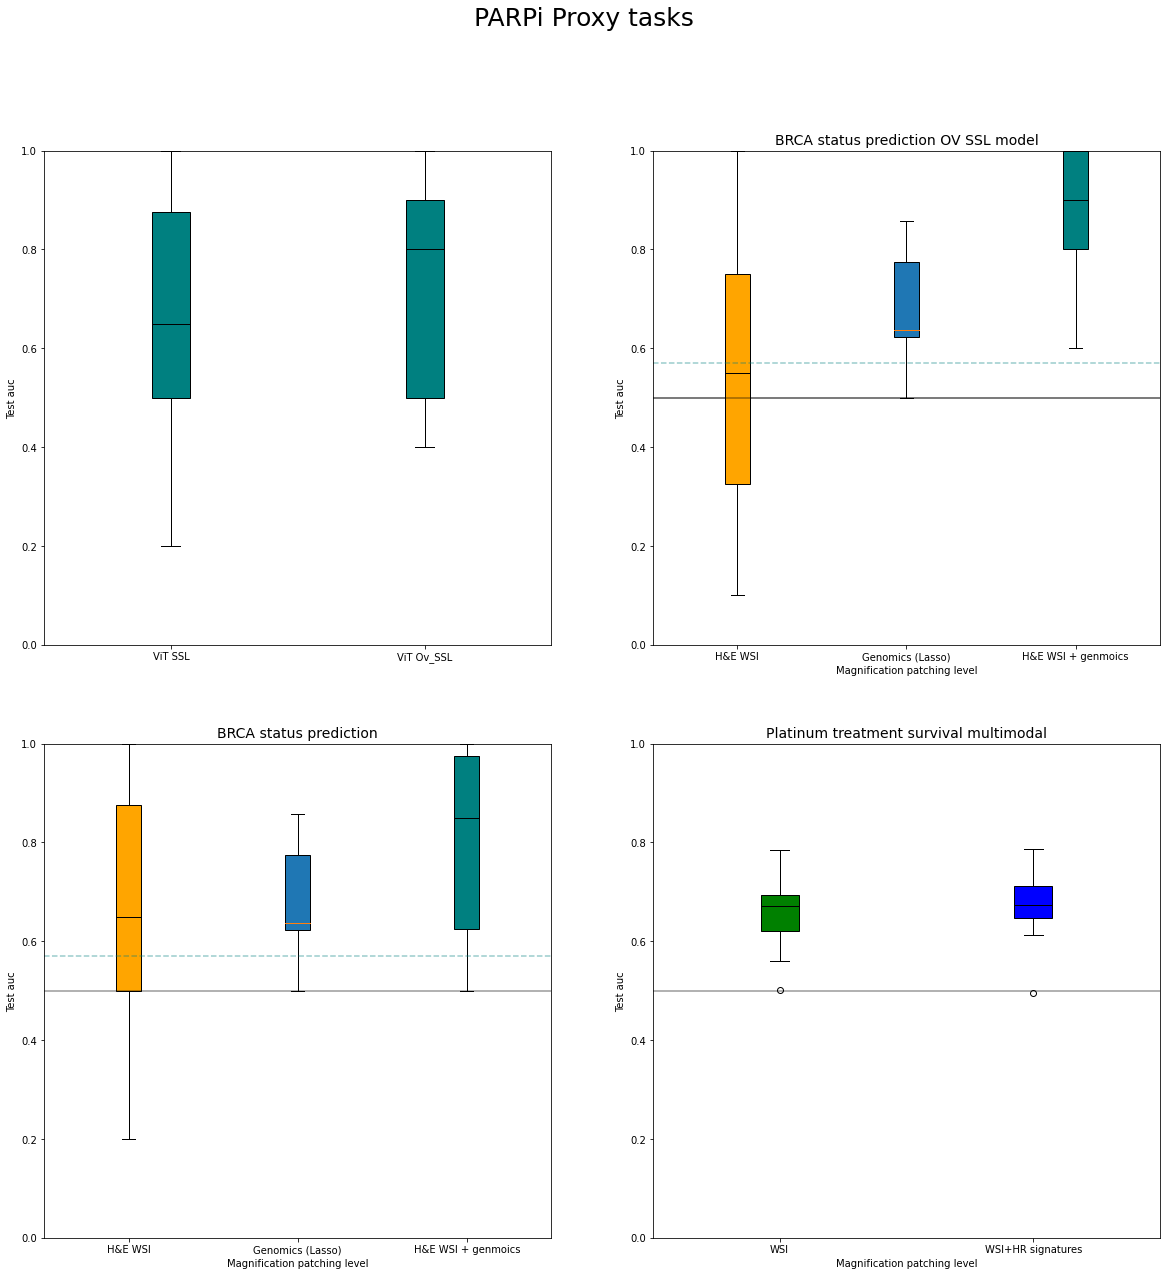

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.patch.set_facecolor('white')
  

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/FFPE_BRCA_unimodal_1125_s1" #15 epocs 10 fold.
plot_splits(root_dir,axes[0,0],0,c='teal',label="ViT SSL", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/FFPE_BRCA_unimodal_OV_SSL_checkpoint10_6454_s1" #15 epocs 10 fold.
plot_splits(root_dir,axes[0,0],1,c='teal',label="ViT Ov_SSL", marker="o")



##### Multimodal Ovarian embedder 

axes[0,1].set_title("Backbone Unimodal WSI internal comparisons", fontsize=14)
axes[0,1].text(.01, .99, '', ha='left', va='top', transform=axes[0,1].transAxes)
axes[0,1].axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes[0,1].set_xlabel("Expretiments")

# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/FFPE_BRCA_unimodal_OV_SSL_checkpoint10_6454_s1" #15 epocs 10 fold.
root_dir = "/mnt/ncshare/ozkilim/BRCA/results/OV_SSL_checkpoint10_level_0_FFPE_BRCA_8605_s1" #15 epocs 10 fold.

plot_splits(root_dir,axes[0,1],0,c='orange',label="H&E WSI", marker="o")
all_aucs_lasso = np.array([0.8571428571428571, 0.5, 0.6363636363636364, 0.6222222222222222, 0.775])
boxplot = axes[0,1].boxplot(all_aucs_lasso,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            positions=[1],labels=["Genomics (Lasso)"])

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/FFPE_BRCA_multimodal_OV_SSL_checkpoint10_1138_s1" #15 epocs 10 fold.
plot_splits(root_dir,axes[0,1],2,c='teal',label="H&E WSI + genmoics", marker="o")
axes[0,1].axhline(0.57, linestyle='--', color='teal',alpha=0.4,label="Nero et al. 600WSIs")  # Add a dashed line at y=0
# also plot spread of pure omics prediction with RF or whatever for comparason.
axes[0,1].set_title("BRCA status prediction OV SSL model", fontsize=14)
axes[0,1].text(.01, .99, '', ha='left', va='top', transform=axes[0,1].transAxes)
axes[0,1].axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes[0,1].set_xlabel("Magnification patching level")

#### BRCA status ViT embedder !!!!

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/FFPE_BRCA_unimodal_1125_s1" #15 epocs 10 fold.
plot_splits(root_dir,axes[1,0],0,c='orange',label="H&E WSI", marker="o")

all_aucs_lasso = np.array([0.8571428571428571, 0.5, 0.6363636363636364, 0.6222222222222222, 0.775])
boxplot = axes[1,0].boxplot(all_aucs_lasso,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            positions=[1],labels=["Genomics (Lasso)"])

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/FFPE_BRCA_multimodal_4134_s1" #15 epocs 10 fold.
plot_splits(root_dir,axes[1,0],2,c='teal',label="H&E WSI + genmoics", marker="o")
axes[1,0].axhline(0.57, linestyle='--', color='teal',alpha=0.4,label="Nero et al. 600WSIs")  # Add a dashed line at y=0
# also plot spread of pure omics prediction with RF or whatever for comparason.
axes[1,0].set_title("BRCA status prediction", fontsize=14)
axes[1,0].text(.01, .99, '', ha='left', va='top', transform=axes[1,0].transAxes)
axes[1,0].axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes[1,0].set_xlabel("Magnification patching level")

#### Platinum prediction ########


root_dir = "/mnt/ncshare/ozkilim/BRCA/results/pathomic_fusion_plat_responce_DSS_BASELINE_2921_s1" #15 epocs 10 fold.
plot_splits(root_dir,axes[1,1],0,c='green',label="WSI", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/pathomic_fusion_plat_responce_DSS_1046_s1" #15 epocs 10 fold.
plot_splits(root_dir,axes[1,1],1,c='blue',label="WSI+HR signatures", marker="o")

axes[1,1].set_title("Platinum treatment survival multimodal", fontsize=14)
axes[1,1].text(.01, .99, '', ha='left', va='top', transform=axes[1,1].transAxes)
axes[1,1].axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes[1,1].set_xlabel("Magnification patching level")
fig.suptitle("PARPi Proxy tasks",fontsize=25)

# fig.savefig('../figures/first_round_tests.png', dpi=300 ,bbox_inches='tight', pad_inches=.2, facecolor='white')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'HGCS responce prediction.')

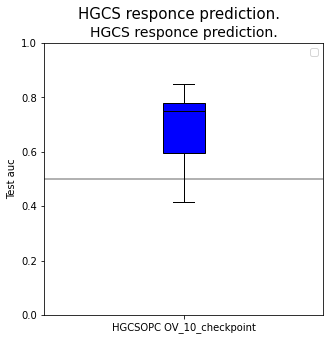

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5)) #was 18 11
fig.patch.set_facecolor('white')
  
root_dir = "/mnt/ncshare/ozkilim/BRCA/results/OV_SSL_checkpoint10_level_0_HGSOC_2140_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,0,c='blue',label="HGCSOPC OV_10_checkpoint", marker="o")


axes.set_title("HGCS responce prediction.", fontsize=14)
# axes.text(.01, .99, '72WSIs, 60:10:20', ha='left', va='top', transform=axes.transAxes)
axes.axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.legend()

# axes[1].legend()
fig.suptitle("HGCS responce prediction.",fontsize=15)

# fig.savefig('../figures/NERO_comparason.png', dpi=300 ,bbox_inches='tight', pad_inches=.2, facecolor='white')



# remove slides poorly patched... 

# Another positive result. Now download genomic data and do joined model. andattention for writing paper.... External test set. 
# Try further embedders and compare.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'COAD')

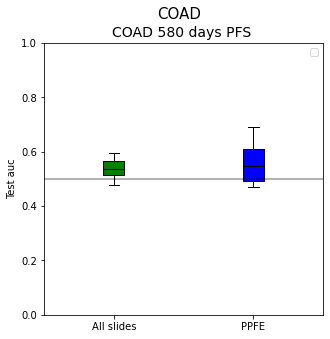

In [4]:
# NOW doanload proteomic data and try to add to beat paper baseline?... # have H&E slides also?... 

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5)) #was 18 11
fig.patch.set_facecolor('white')
  
root_dir = "/mnt/ncshare/ozkilim/BRCA/results/CRC_level_0_COAD_PFS_580_FFPE_3154_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,1,c='blue',label="PPFE", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/CRC_level_0_COAD_PFS_580_5428_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,0,c='green',label="All slides", marker="o")


axes.set_title("COAD 580 days PFS ", fontsize=14)
# axes.text(.01, .99, '72WSIs, 60:10:20', ha='left', va='top', transform=axes.transAxes)
axes.axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.legend()

# axes[1].legend()
fig.suptitle("COAD",fontsize=15)

# TCGA-COAD reseults

# TODO: ask gpt if one slide type might be better...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'BRCA')

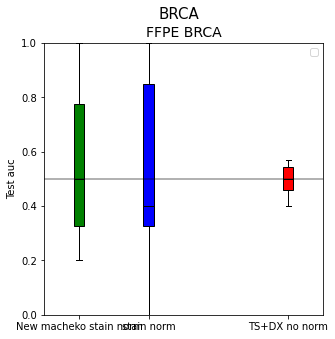

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5)) #was 18 11
fig.patch.set_facecolor('white')
  
root_dir = "/mnt/ncshare/ozkilim/BRCA/results/BRCA_Ov_SSL_FFPE_stain_norm_2529_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,1,c='blue',label="stain norm", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/BRCA_Ov_SSL_FFPE_stain_norm_manchego_new_4822_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,0,c='green',label="New macheko stain norm", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/BRCA_Ov_SSL_FFPE_DX_TS_non_norm_5377_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,3,c='red',label="TS+DX no norm", marker="o")


axes.set_title("FFPE BRCA", fontsize=14)
# axes.text(.01, .99, '72WSIs, 60:10:20', ha='left', va='top', transform=axes.transAxes)
axes.axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.legend()
# axes[1].legend()
fig.suptitle("BRCA",fontsize=15)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'BRCA')

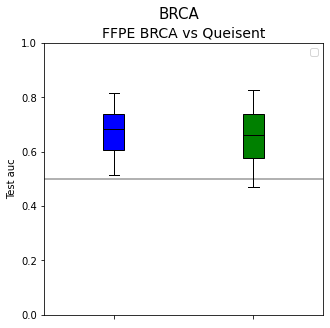

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5)) #was 18 11
fig.patch.set_facecolor('white')
  
root_dir = "/mnt/ncshare/ozkilim/BRCA/results/BRCA_Ov_SSL_BRCA_vs_quiescent_DX_TS_non_norm_8752_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,1,c='b',label="", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/BRCA_Ov_SSL_BRCA_vs_quiescent_DX_TS_NORM_9584_s1" 
plot_splits(root_dir,axes,2,c='g',label="", marker="o")



axes.set_title("FFPE BRCA vs Queisent", fontsize=14)
# axes.text(.01, .99, '72WSIs, 60:10:20', ha='left', va='top', transform=axes.transAxes)
axes.axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.legend()
# axes[1].legend()
fig.suptitle("BRCA",fontsize=15)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([ 0. ,  1. ,  3. ,  7. ,  8. ,  9. , 10. , 11. , 12. , 13. ,  2. ,
         2.5, 14. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

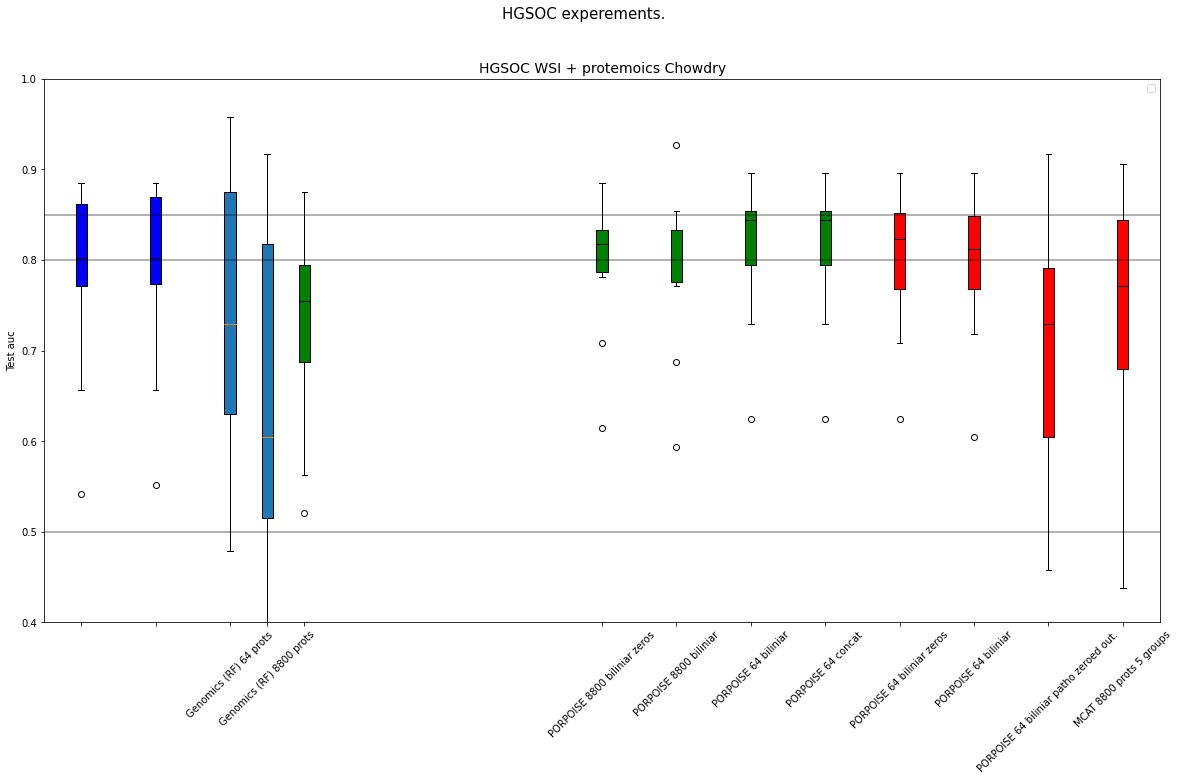

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) #was 18 11
fig.patch.set_facecolor('white')
  

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_CLAM_SM_no_clustering_1114_s1" 
plot_splits(root_dir,axes,0,c='b',label="", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_multimodal_unimodal_clamSB1207_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,1,c='b',label="", marker="o")



root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_multimodal_8735_s1" 
plot_splits(root_dir,axes,3,c='g',label="", marker="o")


root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_PorpoiseMMF_100_epoc_zeroed_6707_s1" 
plot_splits(root_dir,axes,7,c='g',label="PORPOISE 8800 biliniar zeros", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_PorpoiseMMF_100_epoc_3002_s1" 
plot_splits(root_dir,axes,8,c='g',label="PORPOISE 8800 biliniar", marker="o")


root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_PorpoiseMMF_100_epoc_64prots_5079_s1" 
plot_splits(root_dir,axes,9,c='g',label="PORPOISE 64 biliniar", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_PorpoiseMMF_100_epoc_64prots_5079_s1" 
plot_splits(root_dir,axes,10,c='g',label="PORPOISE 64 concat", marker="o")



root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_PorpoiseMMF_100_epoc_64prots_zeros_82_s1" 
plot_splits(root_dir,axes,11,c='r',label="PORPOISE 64 biliniar zeros", marker="o")



root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_PorpoiseMMF_100_epoc_64prots_biliar_fusion_1203_s1" 
plot_splits(root_dir,axes,12,c='r',label="PORPOISE 64 biliniar", marker="o")


root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_PorpoiseMMF_100_epoc_64prots_zero_outpatho_188_s1" 
plot_splits(root_dir,axes,13,c='r',label="PORPOISE 64 biliniar patho zeroed out.", marker="o")



all_aucs_lasso = np.array([0.54166667, 0.875, 0.875, 0.91666667, 0.95833333, 0.70833333 ,0.47916667, 0.64583333, 0.625 ,0.75])

boxplot = axes.boxplot(all_aucs_lasso,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            positions=[2],labels=["Genomics (RF) 64 prots"])

all_aucs_lasso = np.array([0.70833333, 0.85416667, 0.5625 ,    0.89583333 ,0.91666667, 0.5,0.47916667, 0.22916667, 0.60416667,0.60416667])

boxplot = axes.boxplot(all_aucs_lasso,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            positions=[2.5],labels=["Genomics (RF) 8800 prots"])


root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_MCAT_100_epoc_8800_prots_10_epoc8653_s1" 
plot_splits(root_dir,axes,14,c='r',label="MCAT 8800 prots 5 groups", marker="o")



axes.set_title("HGSOC WSI + protemoics Chowdry", fontsize=14)
# axes.text(.01, .99, '72WSIs, 60:10:20', ha='left', va='top', transform=axes.transAxes)
axes.axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.axhline(0.8, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.axhline(0.85, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0

axes.set_ylim([0.4,1])

axes.legend()
# axes[1].legend()
fig.suptitle("HGSOC experements.",fontsize=15)

plt.xticks(rotation=45) 
###### need to tryo ther comination method! 

# Need to try all proteins and crosds corr method....

# Same with 8k zero of real data... 

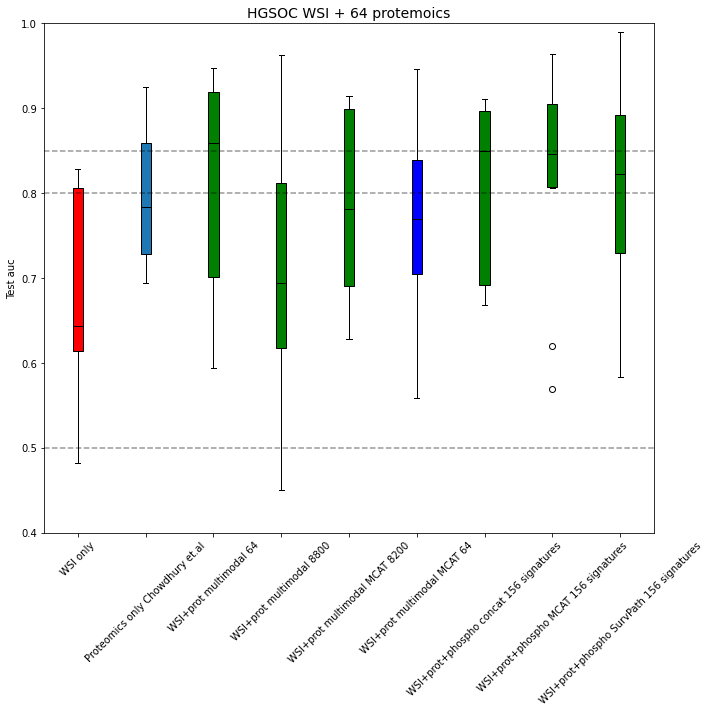

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10)) #was 18 11
fig.patch.set_facecolor('white')
  

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_PorpoiseMMF_Oz_Split_zeroed_50_{rand_int}_s1" 
plot_splits(root_dir,axes,0,c='r',label="WSI only", marker="o")



all_aucs_lasso = np.array([0.82857143 ,0.72839506, 0.7,0.86507937, 0.84285714, 0.72857143, 0.87857143, 0.69444444, 0.7375,0.925])

boxplot = axes.boxplot(all_aucs_lasso,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            positions=[1],labels=["Proteomics only Chowdhury et.al"])
boxplot['medians'][0].set_color('black')

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_oz_split_PorpoiseMMF_64{rand_int}_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,2,c='g',label="WSI+prot multimodal 64", marker="o")


root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_oz_split_PorpoiseMMF_8800{rand_int}_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,3,c='g',label="WSI+prot multimodal 8800", marker="o")



root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_oz_split_MCAT_{rand_int}_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,4,c='g',label="WSI+prot multimodal MCAT 8200", marker="o")


root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_MCAT_Surv_64_groups_split_20{rand_int}_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,5,c='b',label="WSI+prot multimodal MCAT 64", marker="o")


root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_PorpoiseMMF_protein_and_phospho_selected_50{rand_int}_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,6,c='g',label="WSI+prot+phospho concat 156 signatures", marker="o")

root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_MCAT_Surv_protein_and_phospho_selected{rand_int}_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,7,c='g',label="WSI+prot+phospho MCAT 156 signatures", marker="o")


root_dir = "/mnt/ncshare/ozkilim/BRCA/results_HGSOC_multimodal/HGSOC_SurvPath_proteo_phospproteo_50_{rand_int}_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,8,c='g',label="WSI+prot+phospho SurvPath 156 signatures", marker="o")


axes.set_title("HGSOC WSI + 64 protemoics", fontsize=14)
# axes.text(.01, .99, '72WSIs, 60:10:20', ha='left', va='top', transform=axes.transAxes)
axes.axhline(0.5, linestyle='--', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.axhline(0.8, linestyle='--', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.axhline(0.85, linestyle='--', color='black',alpha=0.4)  # Add a dashed line at y=0

axes.set_ylim([0.4,1])

# axes.legend()
# axes[1].legend()
# fig.suptitle("HGSOC multimodal.",fontsize=15)

plt.xticks(rotation=45) 
plt.tight_layout()

fig.savefig('Multimodal_Chowdry.png',format="png", dpi=200,bbox_inches='tight')  # Saves the figure as a PNG file
plt.show()

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


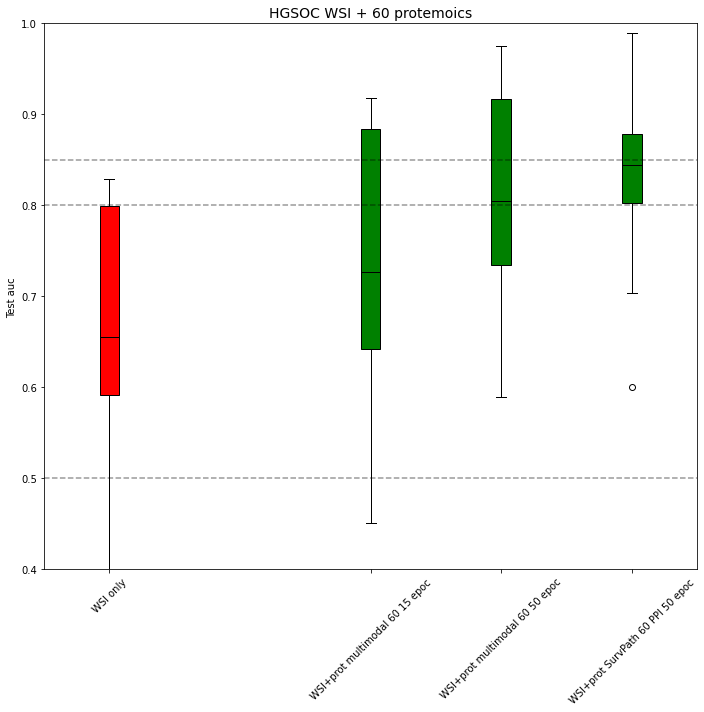

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10)) #was 18 11
fig.patch.set_facecolor('white')
  

root_dir = "/mnt/ncshare/ozkilim/BRCA/results_HGSOC_multimodal/HGSOC_PorpoiseMMF_60_proteins_zeroed_15epocs_{rand_int}_s1" 
plot_splits(root_dir,axes,0,c='r',label="WSI only", marker="o")


# all_aucs_lasso = np.array([0.82857143 ,0.72839506, 0.7,0.86507937, 0.84285714, 0.72857143, 0.87857143, 0.69444444, 0.7375,0.925])

# boxplot = axes.boxplot(all_aucs_lasso,
#             vert=True,  # vertical box alignment
#             patch_artist=True,  # fill with color
#             positions=[1],labels=["Proteomics only Chowdhury et.al"])
# boxplot['medians'][0].set_color('black')

root_dir = "/mnt/ncshare/ozkilim/BRCA/results_HGSOC_multimodal/HGSOC_PorpoiseMMF_60_proteins_15epocs_{rand_int}_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,2,c='g',label="WSI+prot multimodal 60 15 epoc", marker="o")


root_dir = "/mnt/ncshare/ozkilim/BRCA/results_HGSOC_multimodal/HGSOC_PorpoiseMMF_60_proteins_50epocs_{rand_int}_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,3,c='g',label="WSI+prot multimodal 60 50 epoc", marker="o")


root_dir = "/mnt/ncshare/ozkilim/BRCA/results_HGSOC_multimodal/HGSOC_SurvPath_proteo_60_PPI_clusters_s1" 
# root_dir = "/mnt/ncshare/ozkilim/BRCA/results/HGSOC_unimodal_OV_SSL_checkpoint10_8403_s1" 
plot_splits(root_dir,axes,4,c='g',label="WSI+prot SurvPath 60 PPI 50 epoc", marker="o")




axes.set_title("HGSOC WSI + 60 protemoics", fontsize=14)
# axes.text(.01, .99, '72WSIs, 60:10:20', ha='left', va='top', transform=axes.transAxes)
axes.axhline(0.5, linestyle='--', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.axhline(0.8, linestyle='--', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.axhline(0.85, linestyle='--', color='black',alpha=0.4)  # Add a dashed line at y=0

axes.set_ylim([0.4,1])

# axes.legend()
# axes[1].legend()
# fig.suptitle("HGSOC multimodal.",fontsize=15)

plt.xticks(rotation=45) 
plt.tight_layout()

fig.savefig('Multimodal_Chowdry.png',format="png", dpi=200,bbox_inches='tight')  # Saves the figure as a PNG file
plt.show()

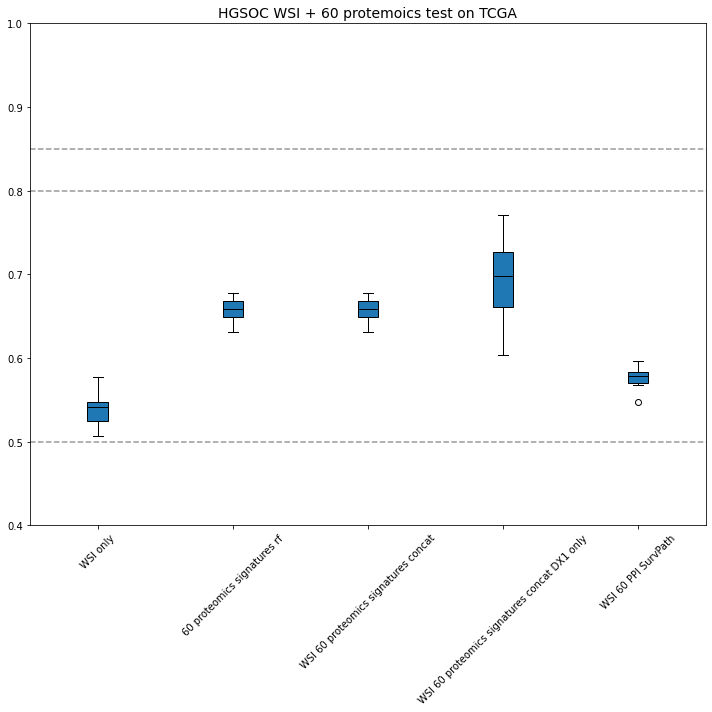

In [4]:
import pandas as pd 
# testing results on held out (further split by tissue type..)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10)) #was 18 11
fig.patch.set_facecolor('white')
  


all_aucs_wsi = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/eval_results/EVAL_TCGA_OV_platinum_multimodal_60_concat_zeroed/summary.csv")
all_aucs_wsi = all_aucs_wsi["test_auc"]
boxplot = axes.boxplot(all_aucs_wsi,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            positions=[0],labels=["WSI only"])
boxplot['medians'][0].set_color('black')



proteomics_aucs = np.array([0.6846372377622378, 0.6633522727272727, 0.6851835664335664, 0.6555725524475523, 0.6498907342657343, 0.6453671328671328, 0.645673076923077, 0.6553103146853148, 0.6451048951048952, 0.6652972027972027])

all_aucs_multi_concat = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/eval_results/EVAL_TCGA_OV_platinum_multimodal_60_concat/summary.csv")
all_aucs_multi_concat = all_aucs_multi_concat["test_auc"]
boxplot = axes.boxplot(all_aucs_multi_concat,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            positions=[1],labels=["60 proteomics signatures rf"])
boxplot['medians'][0].set_color('black')




all_aucs_multi_concat = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/eval_results/EVAL_TCGA_OV_platinum_multimodal_60_concat/summary.csv")
all_aucs_multi_concat = all_aucs_multi_concat["test_auc"]
boxplot = axes.boxplot(all_aucs_multi_concat,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            positions=[2],labels=["WSI 60 proteomics signatures concat"])
boxplot['medians'][0].set_color('black')



all_aucs_multi_concat = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/eval_results/EVAL_TCGA_OV_platinum_multimodal_60_concat_50_epocs/summary.csv")
all_aucs_multi_concat = all_aucs_multi_concat["test_auc"]

all_aucs_multi_concat = np.array([0.71875,0.625,0.65625,0.7291666666666666,0.687,0.6041666666666666,0.6770833333333334, 0.7291666666666667,0.7083333333333333,0.7708333333333334])


boxplot = axes.boxplot(all_aucs_multi_concat,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            positions=[3],labels=["WSI 60 proteomics signatures concat DX1 only"])
boxplot['medians'][0].set_color('black')



all_aucs_multi_concat = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/eval_results/EVAL_TCGA_OV_platinum_multimodal_60_SurvPath_PPI_50_epocs/summary.csv")
all_aucs_multi_concat = all_aucs_multi_concat["test_auc"]
boxplot = axes.boxplot(all_aucs_multi_concat,
            vert=True,  # vertical box alignment.
            patch_artist=True,  # fill with color.
            positions=[4],labels=["WSI 60 PPI SurvPath"])
boxplot['medians'][0].set_color('black')




axes.set_title("HGSOC WSI + 60 protemoics test on TCGA", fontsize=14)
# axes.text(.01, .99, '72WSIs, 60:10:20', ha='left', va='top', transform=axes.transAxes)
axes.axhline(0.5, linestyle='--', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.axhline(0.8, linestyle='--', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.axhline(0.85, linestyle='--', color='black',alpha=0.4)  # Add a dashed line at y=0

axes.set_ylim([0.4,1])

# axes.legend()
# axes[1].legend()
# fig.suptitle("HGSOC multimodal.",fontsize=15)

plt.xticks(rotation=45) 
plt.tight_layout()

fig.savefig('Multimodal_Chowdry.png',format="png", dpi=200,bbox_inches='tight')  # Saves the figure as a PNG file
plt.show()